# Comparing two time series

When you have paired data, for example monthly mean temperatures from two stations, you can investigate temperature flucations at both sides and compare them. This can for example be used to detect problems with one of the station's data. This notebook gives you example code. In this example we continue with the monthly mean temperature time series from the GHCN stations in NY that have the data complete through the period 1951-2018. 

We use this notebook as an opportunity to  (a) give you example code for creating simple scatter plots with Python, and (b) introduce one more new object type in Python.


### Introduction of one more object type in Python: _Dictionary_

We have been able to solve many data analysis problems with lists and numpy arrays.
One more very very useful and powerful 'data container' can be utilized in Python: _dictionaries_!
We use the dictionary here to look up the station's complete name for a given station ID.

Dictionaries are a collection of key and value pairs. We can access the values from the dictionary with the key.

In this notebook we use a dictionary to collect the station id names and the full name of the station. 
So we can look for each station id (the key) the city's name (the value).

Note: This notebook also relies on the module script *support.py* that we used first in unit8. 
Now we are wroking in the the directory 'unit9' and therefore we have to tell Python kernel where to find the module script file. This is done with the function call *sys.path.append("../unit8")*.

(You may have to update the path name in this function call if you placed *support.py* into a different directoy.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
# we want to make use of the support module from unit8 
# so we have to add to the list of directory pathes the 
# relative path, so the kernel knows where to look for the file support.py
import sys
sys.path.append("../unit8/")

import support as spt


In [4]:
# the dictionary with station ids (the 'key'), and the full station name (the 'value' associated with the key)

stations_ny={'USW00014732':'NEW YORK LAGUARDIA AP',
             'USW00014733':'BUFFALO',
             'USW00014735':'ALBANY AP',
             'USW00014750':'GLENS FALLS AP',
             'USW00014768':'ROCHESTER GTR INTL AP',
             'USW00014771':'SYRACUSE HANCOCK INTL AP', 
             'USW00094725':'MASSENA INTL AP',
             'USW00094728':'NEW YORK CNTRL PK TWR'}


In [7]:
# here you can see all key-value pairs
for key in stations_ny:
    print (key+' '+stations_ny[key])

USW00014732 NEW YORK LAGUARDIA AP
USW00014733 BUFFALO
USW00014735 ALBANY AP
USW00014750 GLENS FALLS AP
USW00014768 ROCHESTER GTR INTL AP
USW00014771 SYRACUSE HANCOCK INTL AP
USW00094725 MASSENA INTL AP
USW00094728 NEW YORK CNTRL PK TWR


<P style="background-color:lightgreen;font-size:130%">
<BR>
Main program code
<BR>
<BR>
</P>

In [9]:

# user define variables:
varname="avgt"
year1,year2= 1951,2018
monthlist=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# select two stations for comparison:
sid1='USW00014750'
sid2='USW00014771'

# --------- MAIN PART ---------
x1,y1=spt.get_stationdata_monthly(sid1,\
                            varname,startyear=year1,endyear=year2)
x1=np.array(x1)
y1=np.array(y1)

x2,y2=spt.get_stationdata_monthly(sid2,\
                            varname,startyear=year1,endyear=year2)
x2=np.array(x2)
y2=np.array(y2)


>send data request to http://data.rcc-acis.org/StnData?sid=USW00014750&&sdate=1951-01-1&&edate=2018-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00014750
year range: 1951 - 2018
> still waiting for response ...
>... done
>send data request to http://data.rcc-acis.org/StnData?sid=USW00014771&&sdate=1951-01-1&&edate=2018-12-31&interval=mly&elems=mly_mean_avgt
station id: USW00014771
year range: 1951 - 2018
> still waiting for response ...
>... done


In [10]:
# create 2dim arrays with years in rows and month in columns
# only works when we have exact 12*nyears of monthly data in both data!!!
nyear=int(x1.size/12) # integer number required below
print ("reshape arrays from 1-dim shape of size "+str(x1.size)+" to "+str(nyear)+" x 12")
x1=np.reshape(x1,newshape=(nyear,12))
y1=np.reshape(y1,newshape=(nyear,12))

x2=np.reshape(x2,newshape=(nyear,12)) 
y2=np.reshape(y2,newshape=(nyear,12))


reshape arrays from 1-dim shape of size 816 to 68 x 12


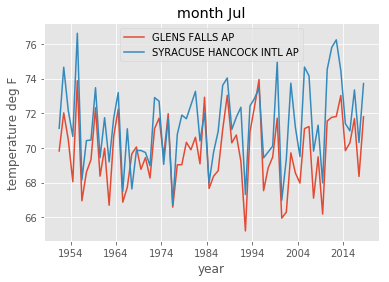

In [11]:
# select one column for one month (0=Jan, 1=Feb, 11=Dec)
imon=6
plt.style.use('ggplot')
# use the dictionary to look up the station name and add them to the legend
plt.plot(x1[:,imon],y1[:,imon],label=stations_ny[sid1])
plt.plot(x2[:,imon],y2[:,imon,],label=stations_ny[sid2])
plt.title('month '+monthlist[imon])
plt.xlabel('year')
plt.ylabel('temperature deg F')
plt.legend()
plt.show()

Text(0.5,1,'anomalies for month Jul')

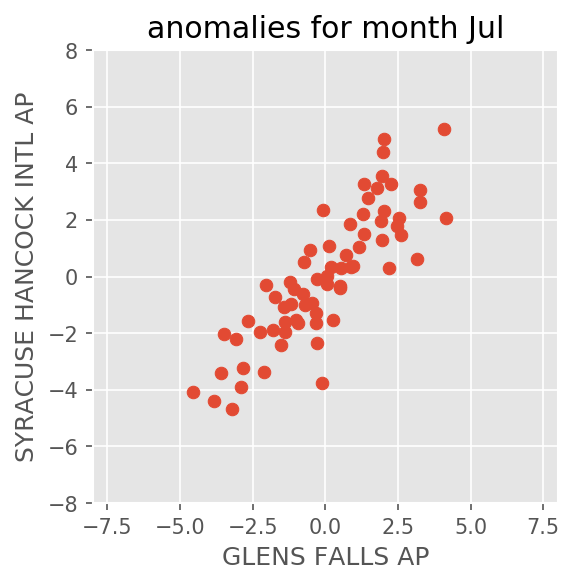

In [92]:
# (a) subtract the long-term mean to concentrate on the year to year variations

m1=np.mean(y1,axis=0)
m2=np.mean(y2,axis=0)


plt.figure(figsize=(4,4),dpi=150)
plt.scatter(y1[:,imon]-m1[imon],y2[:,imon]-m2[imon])

plt.xlim([-8,8])
plt.ylim([-8,8])
plt.xlabel(stations_ny[sid1])
plt.ylabel(stations_ny[sid2])
plt.title("anomalies for month "+monthlist[imon])

Text(0.5,1,'anomalies for month Jul')

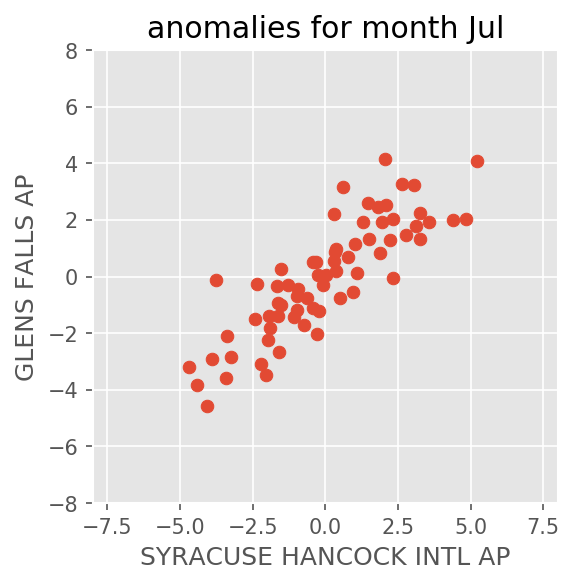

In [93]:
plt.figure(figsize=(4,4),dpi=150)
plt.scatter(y2[:,imon]-m2[imon],y1[:,imon]-m1[imon])

plt.xlim([-8,8])
plt.ylim([-8,8])
plt.ylabel(stations_ny[sid1])
plt.xlabel(stations_ny[sid2])
plt.title("anomalies for month "+monthlist[imon])

References:
    
- [Python _dictionaries_](https://www.python-course.eu/python3_dictionaries.php)